# Principal Component Analysis

#### *variationalform* <https://variationalform.github.io/>

#### *Just Enough: progress at pace*

<https://variationalform.github.io/>

<https://github.com/variationalform>

Simon Shaw
<https://www.brunel.ac.uk/people/simon-shaw>.


<table>
<tr>
<td>
<img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1" style="height:18px"/>
</td>
<td>

<p>
This work is licensed under CC BY-SA 4.0 (Attribution-ShareAlike 4.0 International)

<p>
Visit <a href="http://creativecommons.org/licenses/by-sa/4.0/">http://creativecommons.org/licenses/by-sa/4.0/</a> to see the terms.
</td>
</tr>
</table>

<table>
<tr>
<td>This document uses python</td>
<td>
<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" style="height:30px"/>
</td>
<td>and also makes use of LaTeX </td>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/LaTeX_logo.svg/320px-LaTeX_logo.svg.png" style="height:30px"/>
</td>
<td>in Markdown</td> 
<td>
<img src="https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png" style="height:30px"/>
</td>
</tr>
</table>

## What this is about:

The connection between SVD, the **Singular Value Decomposition**, and PCA,
**Principal Component Analysis**.

As usual our emphasis will be on *doing* rather than *proving*:
*just enough: progress at pace*


## Assigned Reading

For this worksheet you are recommended Chapters 4 and 10 of [MML],
Chapter 10 of [MLFCES], Chapter 5.3 of [IPDS], 

- MML: Mathematics for Machine Learning, by Marc Peter Deisenroth, A. Aldo Faisal, and Cheng Soon Ong.
  Cambridge University Press. <https://mml-book.github.io>.
- MLFCES: Machine Learning: A First Course for Engineers and Scientists, by Andreas Lindholm,
  Niklas Wahlström, Fredrik Lindsten, Thomas B. Schön. Cambridge University Press. 
  <http://smlbook.org>.
- IPDS: Introduction to Probability for Data Science, by Stanley H. Chan,
  <https://probability4datascience.com>

These can be accessed legally and without cost.

There are also these useful references for coding:

- PT: `python`: <https://docs.python.org/3/tutorial>
- NP: `numpy`: <https://numpy.org/doc/stable/user/quickstart.html>
- MPL: `matplotlib`: <https://matplotlib.org>

## Review


We have seen these 

- Eigenvalue decomposition
- SVD, the **Singular Value Decomposition**

Let's review them...

## Eigen-systems of Symmetric Matrices

Given a real square $n$-row by $n$-column matrix,
$\boldsymbol{A}\in\mathbb{R}^{n\times n}$ the eigenvalue problem
is that of finding scalar eigenvalues $\lambda$
and $n$-dimensional eigenvectors $\boldsymbol{v}$ such that

$$
\boldsymbol{A}\boldsymbol{v}=\lambda\boldsymbol{v}    
\quad\Longrightarrow\quad
\boldsymbol{A}\boldsymbol{V}=\boldsymbol{V}\boldsymbol{D}  
\quad\Longrightarrow\quad
\boldsymbol{A} = 
\sum_{k=1}^n
\lambda_k\boldsymbol{v}_k\boldsymbol{v}_k^T.
$$

The eigensystem is **real**.

We have the *Spectral Theorem* - see [MML, Theorem 4.15]

> **Spectral Theorem (for matrices)**
> If $\boldsymbol{A}$ is real and symmetric then its eigenvalues are
> all real and its eigenvector matrix $\boldsymbol{V}$ can be taken
> as *orthogonal* so that $\boldsymbol{V}^{-1}=\boldsymbol{V}^T$.
Hence...

$$
\boldsymbol{A}=\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T  
$$


## The SVD: Singular Value Decomposition

Given a real $m$-row by $n$-column matrix, 
$\boldsymbol{B}\in\mathbb{R}^{m\times n}$

$$
\boldsymbol{B} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T
=\sum_{j=1}^{p} \sigma_j \boldsymbol{u}_j\boldsymbol{v}_j^T
$$

where: for the left singular vectors: $\boldsymbol{U}\in\mathbb{R}^{m\times m}$;
for the singular values: $\boldsymbol{\Sigma}\in\mathbb{R}^{m\times n}$;
and, for the right singular vectors, $\boldsymbol{V}\in\mathbb{R}^{n\times n}$.
Here $p=\min\{m,n\}$.

Note that $\boldsymbol{\Sigma}=\text{diag}(\sigma_1,\ldots,\sigma_p) + \mathit{zeros}$,
and we can always arrange that $0 \le \sigma_1\le\cdots\le\sigma_p$.

As $\boldsymbol{B}$ is real,
$\boldsymbol{U}$ and $\boldsymbol{V}$ are real and *orthogonal*.

If $\sigma_r\ne 0$ and $\sigma_p= 0$ for all $p>r$ then
$r$ is the rank of $\boldsymbol{B}$.



## How are these factorizations connected?

On the face of it they are very different. the first applies only to 
square symmetric matrices, while the second applies also to
rectangular, and hence (why?) non-symmetric matrices.

But... Look at this... Given the SVD 
$\boldsymbol{B} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T$
we have,

$$
\boldsymbol{B}^T\boldsymbol{B}
= \Big(\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T\Big)^T
\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T
$$

and remembering that, in general,
$(\boldsymbol{K}\boldsymbol{L})^T = \boldsymbol{L}^T\boldsymbol{K}^T$
(this could called *taking the transpose through*), we can write,

$$
\boldsymbol{B}^T\boldsymbol{B}
= \boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T
\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T
= \boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{V}^T
$$
because $\boldsymbol{U}^T\boldsymbol{U}=\boldsymbol{I}$ (orthogonal).

Similarly, because also
$\boldsymbol{V}^T\boldsymbol{V}=\boldsymbol{I}$ (orthogonal),

$$
\boldsymbol{B}\boldsymbol{B}^T
= 
\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T
\Big(\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T\Big)^T
= 
\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T
\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T
= 
\boldsymbol{U}\boldsymbol{\Sigma}
\boldsymbol{\Sigma}^T\boldsymbol{U}^T.
$$

Do you recognise these?

We have just shown that,

$$
\boldsymbol{B}^T\boldsymbol{B}
= \boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{V}^T
\qquad\text{ and }\qquad
\boldsymbol{B}\boldsymbol{B}^T
= 
\boldsymbol{U}\boldsymbol{\Sigma}
\boldsymbol{\Sigma}^T\boldsymbol{U}^T.
$$

Familiar? Think about $\boldsymbol{A}=\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T$.

- Put $\boldsymbol{A} = \boldsymbol{B}^T\boldsymbol{B}$ (symmetric) and 
$\boldsymbol{D} = \boldsymbol{\Sigma}^T\boldsymbol{\Sigma}$. Then,

$$
\boldsymbol{B}^T\boldsymbol{B}
= \boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{V}^T
\qquad\text{becomes}\qquad
\boldsymbol{A}=\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T.
$$

- Put $\boldsymbol{A} = \boldsymbol{B}\boldsymbol{B}^T$ (symmetric) and 
$\boldsymbol{D} = \boldsymbol{\Sigma}\boldsymbol{\Sigma}^T$. Then,

$$
\boldsymbol{B}\boldsymbol{B}^T
= 
\boldsymbol{U}\boldsymbol{\Sigma}
\boldsymbol{\Sigma}^T\boldsymbol{U}^T
\qquad\text{becomes}\qquad
\boldsymbol{A}=\boldsymbol{U}\boldsymbol{D}\boldsymbol{U}^T.
$$

- $\boldsymbol{V}$, the right singular vectors in the SVD are the eigenvectors of 
$\boldsymbol{B}^T\boldsymbol{B}$.

- $\boldsymbol{U}$, the left singular vectors in the SVD are the eigenvectors of 
$\boldsymbol{B}\boldsymbol{B}^T$.

- In both cases $\boldsymbol{\Sigma}$ contains the positive square
roots of the eigenvalues of $\boldsymbol{B}^T\boldsymbol{B}$
and $\boldsymbol{B}\boldsymbol{B}^T$.

- **NOTE:** $\boldsymbol{B}^T\boldsymbol{B}$ and $\boldsymbol{B}\boldsymbol{B}^T$
have the same non-zero eigenvalues (same rank).


## Why does this matter?
 
Our data, $\boldsymbol{X}$, is organized into rows of feature values with one observation per row 
and one feature per column. We write this as

$$
\boldsymbol{X} = \Big(
\boldsymbol{X}_0, \boldsymbol{X}_1, \cdots, \boldsymbol{X}_N
\Big)
$$

If $N=3$ (four features)...

... we recall that the **covariance matrix** takes this form:

$$
\boldsymbol{M} = 
\left(\begin{array}{llll}
\mathrm{Var}(X_0)  &  \mathrm{Cov}(X_0,X_1)  &  \mathrm{Cov}(X_0,X_2)  &  \mathrm{Cov}(X_0,X_3) \\
\mathrm{Cov}(X_1,X_0)  &  \mathrm{Var}(X_1)  &  \mathrm{Cov}(X_1,X_2)  &  \mathrm{Cov}(X_1,X_3) \\
\mathrm{Cov}(X_2,X_0)  &  \mathrm{Cov}(X_2,X_1)  &  \mathrm{Var}(X_2)  &  \mathrm{Cov}(X_2,X_3) \\
\mathrm{Cov}(X_3,X_0)  &  \mathrm{Cov}(X_3,X_1)  &  \mathrm{Cov}(X_3,X_2)  &  \mathrm{Var}(X_3) \\
\end{array}\right)
$$

because $\mathrm{Cov}(X,X)=\mathrm{Var}(X)$. Since $\mathrm{Cov}(X,Y)=\mathrm{Cov}(Y,X)$, this matrix is **symmetric**
and so has real eigenvalues.

We have seen that if the data are already centred then,

$$
(N-1)\boldsymbol{M} = 
\left(\begin{array}{llll}
\boldsymbol{X}_0\cdot\boldsymbol{X}_0 & \boldsymbol{X}_0\cdot\boldsymbol{X}_1 &
\boldsymbol{X}_0\cdot\boldsymbol{X}_2 & \boldsymbol{X}_0\cdot\boldsymbol{X}_3
\\
\boldsymbol{X}_1\cdot\boldsymbol{X}_0 & \boldsymbol{X}_1\cdot\boldsymbol{X}_1 &
\boldsymbol{X}_1\cdot\boldsymbol{X}_2 & \boldsymbol{X}_1\cdot\boldsymbol{X}_3
\\
\boldsymbol{X}_2\cdot\boldsymbol{X}_0 & \boldsymbol{X}_2\cdot\boldsymbol{X}_1 &
\boldsymbol{X}_2\cdot\boldsymbol{X}_2 & \boldsymbol{X}_2\cdot\boldsymbol{X}_3
\\
\boldsymbol{X}_3\cdot\boldsymbol{X}_0 & \boldsymbol{X}_3\cdot\boldsymbol{X}_1 &
\boldsymbol{X}_3\cdot\boldsymbol{X}_2 & \boldsymbol{X}_3\cdot\boldsymbol{X}_3
\\
\end{array}\right)
=
\left(\begin{array}{l}
\boldsymbol{X}_0^T
\\
\boldsymbol{X}_1^T
\\
\boldsymbol{X}_2^T
\\
\boldsymbol{X}_3^T
\\
\end{array}\right)
\left(\begin{array}{llll}
\boldsymbol{X}_0
&
\boldsymbol{X}_1
&
\boldsymbol{X}_2
&
\boldsymbol{X}_3
\\
\end{array}\right)
$$

and, hence (in general), the (sample) covariance matrix is

$$
\boldsymbol{M} = 
\frac{1}{(N-1)}\boldsymbol{X}^T\boldsymbol{X}.
$$


# I N C O M P L E T E

There is more to come - this document will be replaced with an update in due course.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
dfp = sns.load_dataset('penguins')
dfp2 = dfp.dropna()
dfp2.isna().sum()
dfp2 = dfp2.reset_index(drop=True)
print(dfp2.shape)

# create our labelled training and test data sets with 60/40 train/test split
X = dfp2.iloc[:, 2:6].values
y = dfp2.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)
# scale the data
scaler = StandardScaler()
# mean zero, unit variance 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(333, 7)


In [3]:
# take the SVD of X_train - we must treat X_test as 'unseen'
U, S, VT = np.linalg.svd(X_train, full_matrices=False) # full_matrices=False - discussed later

print(S)
print(S*S)
print(VT.T)

[23.45855015 12.33831915  8.56452686  4.48454962]
[550.303575   152.23411933  73.3511204   20.11118527]
[[-0.45995024  0.56936535  0.6699126   0.1244427 ]
 [ 0.39640248  0.81412959 -0.38776074 -0.17233601]
 [-0.57552324 -0.0028405  -0.24797151 -0.77927856]
 [-0.5477991   0.11405281 -0.58255373  0.58952459]]


Now look at the covariance matrix of X_train


In [4]:
N = X_train.shape[0]
C = X_train.T @ X_train / (N-1)
print(C)
w, v = np.linalg.eig(C)
print(w*(N-1))
print(w)
print(v)

[[ 1.00505051 -0.2487554   0.66308312  0.61307975]
 [-0.2487554   1.00505051 -0.58658486 -0.45876841]
 [ 0.66308312 -0.58658486  1.00505051  0.88284045]
 [ 0.61307975 -0.45876841  0.88284045  1.00505051]]
[550.303575   152.23411933  73.3511204   20.11118527]
[2.77931098 0.76885919 0.3704602  0.10157164]
[[-0.45995024  0.56936535  0.6699126   0.1244427 ]
 [ 0.39640248  0.81412959 -0.38776074 -0.17233601]
 [-0.57552324 -0.0028405  -0.24797151 -0.77927856]
 [-0.5477991   0.11405281 -0.58255373  0.58952459]]


In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X_train)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.components_)

[0.69133615 0.19124889 0.09214965 0.02526531]
[23.45855015 12.33831915  8.56452686  4.48454962]
[[ 0.45995024 -0.39640248  0.57552324  0.5477991 ]
 [ 0.56936535  0.81412959 -0.0028405   0.11405281]
 [ 0.6699126  -0.38776074 -0.24797151 -0.58255373]
 [ 0.1244427  -0.17233601 -0.77927856  0.58952459]]


## Standard Example

Plot lozenge of Gaussian data

In [6]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html
# decide number of samples, they will have zero mean
Ns = 50
mean = [0, 0]
cov = [[30, 15], [15, 15]] 
w,v = np.linalg.eig(cov)
print(w,'\n',v)
x, y = np.random.multivariate_normal(mean, cov, Ns).T


[39.27050983  5.72949017] 
 [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


In [7]:
# remove the mean - can't assume this
print(f'(before) mean of x = {x.mean()}')
print(f'(before) mean of y = {y.mean()}')
x -= x.mean()
y -= y.mean()
print(f'(after)  mean of x = {x.mean()}')
print(f'(after)  mean of y = {y.mean()}')

(before) mean of x = -0.4043788024073319
(before) mean of y = -1.0257760064645915
(after)  mean of x = 1.4210854715202004e-16
(after)  mean of y = 8.881784197001253e-17


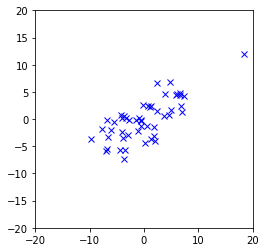

In [8]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'x', color='b')
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.gca().set_aspect('equal')
plt.show()

In [9]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
X = np.hstack((x,y))
Cv = X.T @ X / (Ns-1)
print(Cv)
w,V = np.linalg.eig(Cv)
print('w = ', w)
print('V = \n', V)

[[27.36947921 14.86907652]
 [14.86907652 14.39088293]]
w =  [37.10363405  4.65672808]
V = 
 [[ 0.8366585  -0.54772489]
 [ 0.54772489  0.8366585 ]]


In [10]:
U,S,VT = np.linalg.svd(X)
print(f'S   = {S}')
print(f'S*S = {S*S}')
print(f'S*S/(Ns-1) = {S*S/(Ns-1)}')
print(f'S*S/(Ns-0) = {S*S/(Ns-0)}')
print(f'V = \n{VT.T}')



S   = [42.63892668 15.10561736]
S*S = [1818.07806868  228.17967594]
S*S/(Ns-1) = [37.10363405  4.65672808]
S*S/(Ns-0) = [36.36156137  4.56359352]
V = 
[[ 0.8366585   0.54772489]
 [ 0.54772489 -0.8366585 ]]


In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)
print(f'XV ratio = {pca.explained_variance_ratio_}')
print(f'sing vals = {pca.singular_values_}')
# the component are stored as row vectors
B = pca.components_.T
print('B = \n', B)
print(pca.components_.shape)

XV ratio = [0.88848928]
sing vals = [42.63892668]
B = 
 [[0.8366585 ]
 [0.54772489]]
(1, 2)


In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(f'XV ratio = {pca.explained_variance_ratio_}')
print(f'sing vals = {pca.singular_values_}')
# the component are stored as row vectors
B = pca.components_.T
print('B = \n', B)
print('B.T*B = \n', B.T@B)
Y1 = X @ B[:,[0]] @ B[:,[0]].T
Y2 = X @ B[:,[1]] @ B[:,[1]].T
print(Y1.shape)

XV ratio = [0.88848928 0.11151072]
sing vals = [42.63892668 15.10561736]
B = 
 [[ 0.8366585   0.54772489]
 [ 0.54772489 -0.8366585 ]]
B.T*B = 
 [[ 1.00000000e+00 -1.76012178e-17]
 [-1.76012178e-17  1.00000000e+00]]
(50, 2)


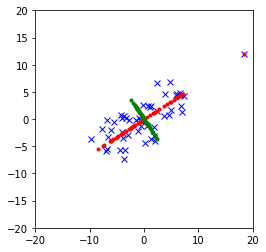

In [13]:
plt.plot(x, y, 'x', color='b')
plt.gca().set_aspect('equal')
plt.plot(Y1[:,0], Y1[:,1], '.', color='r')
plt.plot(Y2[:,0], Y2[:,1], '.', color='g')
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.show()


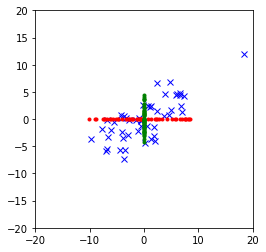

In [14]:
Z1 = X @ B[:,[0]]
Z2 = X @ B[:,[1]]
plt.plot(x, y, 'x', color='b')
plt.plot(Z1[:,0], 0*Z1[:,0], '.', color='r')
plt.plot(0*Z2[:,0], Z2[:,0], '.', color='g')
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.gca().set_aspect('equal')
plt.show()



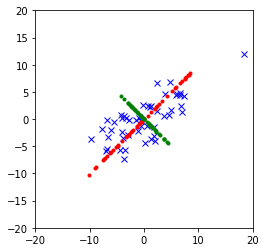

In [15]:
Z1 = X @ B[:,[0]]
Z2 = X @ B[:,[1]]
plt.plot(x, y, 'x', color='b')
plt.plot(Z1[:,0], Z1[:,0], '.', color='r')
plt.plot(Z2[:,0], -Z2[:,0], '.', color='g')
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.gca().set_aspect('equal')
plt.show()

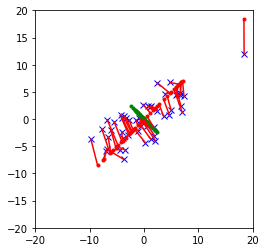

In [16]:
#Z1 = X @ B[:,[0]]
#Z2 = X @ B[:,[1]]
Z1 = X @ B[:,[0]] @ B[:,[0]].T
Z2 = X @ B[:,[1]] @ B[:,[1]].T
plt.plot(x, y, 'x', color='b')
plt.plot(Z1[:,0], Z1[:,0], '.', color='r')
plt.plot(Z2[:,0], -Z2[:,0], '.', color='g')
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.gca().set_aspect('equal')

for k in range(X.shape[0]):
  plt.plot([X[k,0], Z1[k,0]], [X[k,1], Z1[k,0]], '-', color='r')

plt.show()


# FRESH START - Simple Example


[[ 2  1]
 [ 1  2]
 [-2 -1]
 [-1 -2]]
Column means 1, 0.0 and 2, 0.0
XV ratio = [0.9 0.1]
sing vals = [4.24264069 1.41421356]
B = 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
(2, 2)
Shape of Z1 is (4, 2)
Shape of Z2 is (4, 2)


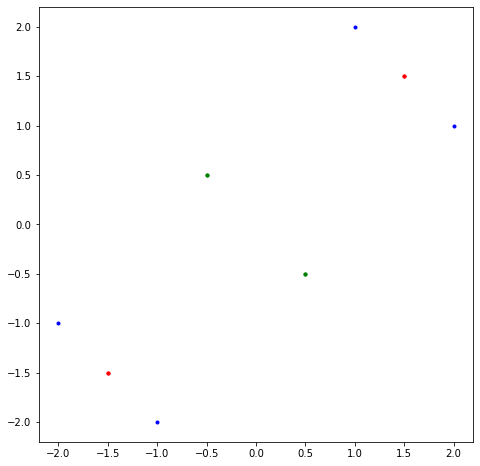

In [34]:
X = np.array([[2,1],[1,2],[-2,-1],[-1,-2]])
print(X)
print(f'Column means 1, {X[:,0].mean()} and 2, {X[:,0].mean()}')
plt.figure(figsize=(8,8))
plt.gca().set_aspect('equal')
plt.plot(X[:,0], X[:,1], '.', color='b')
pca = PCA(n_components=2)
pca.fit(X)
print(f'XV ratio = {pca.explained_variance_ratio_}')
print(f'sing vals = {pca.singular_values_}')
# the component are stored as row vectors, so transpose
B = pca.components_.T
print('B = \n', B)
print(pca.components_.shape)

#Z1 = X @ B[:,[0]]
#Z2 = X @ B[:,[1]]
Z1 = X @ B[:,[0]] @ B[:,[0]].T
Z2 = X @ B[:,[1]] @ B[:,[1]].T
print(f'Shape of Z1 is {Z1.shape}')
print(f'Shape of Z2 is {Z2.shape}')
plt.plot(Z1[:,0], Z1[:,1], '.', color='r')
plt.plot(Z2[:,0], Z2[:,1], '.', color='g')

Column means 1, 0.20752003163363394 and 2, 0.20752003163363394
XV ratio = [0.88294319 0.11705681]
sing vals = [47.78151901 17.39770303]
B = 
 [[ 0.82199188  0.56949921]
 [ 0.56949921 -0.82199188]]
(2, 2)
Shape of Z1 is (50, 2)
Shape of Z2 is (50, 2)


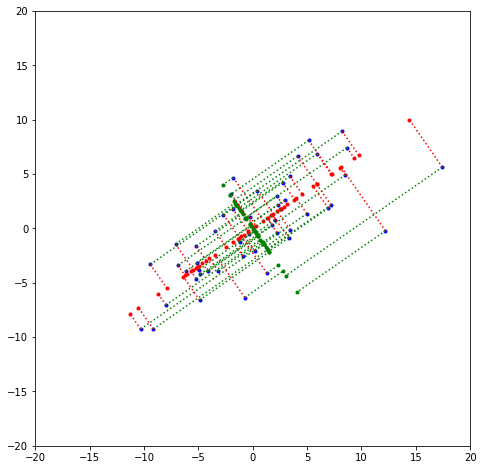

In [58]:
Ns=50
window = 30
#X = np.random.randn(Ns,2)
mean = [0, 0]
cov = [[30, 15], [15, 15]]
x, y = np.random.multivariate_normal(mean, cov, Ns).T
#x = x.reshape(-1,1)
#y = y.reshape(-1,1)
X = np.hstack((x.reshape(-1,1),y.reshape(-1,1)))

if Ns < 5: print(X)
print(f'Column means 1, {X[:,0].mean()} and 2, {X[:,0].mean()}')
plt.figure(figsize=(8,8))
plt.gca().set_aspect('equal')
plt.plot(X[:,0], X[:,1], '.', color='b')
pca = PCA(n_components=2)
pca.fit(X)
print(f'XV ratio = {pca.explained_variance_ratio_}')
print(f'sing vals = {pca.singular_values_}')
# the component are stored as row vectors, so transpose
B = pca.components_.T
print('B = \n', B)
print(pca.components_.shape)

#Z1 = X @ B[:,[0]]
#Z2 = X @ B[:,[1]]
Z1 = X @ B[:,[0]] @ B[:,[0]].T
Z2 = X @ B[:,[1]] @ B[:,[1]].T
print(f'Shape of Z1 is {Z1.shape}')
print(f'Shape of Z2 is {Z2.shape}')
plt.plot(Z1[:,0], Z1[:,1], '.', color='r')
plt.plot(Z2[:,0], Z2[:,1], '.', color='g')

for k in range(Ns):
  plt.plot([X[k,0], Z1[k,0]], [X[k,1],Z1[k,1]], ':', color='r')
  plt.plot([X[k,0], Z2[k,0]], [X[k,1],Z2[k,1]], ':', color='g')


window=20; plt.xlim(-window,window); plt.ylim(-window,window)
plt.show()

In [ ]:
ax1 = plt.subplot(131)
ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax1.plot(t1, f(t1))

ax2 = plt.subplot(221)
ax2.margins(2, 2)           # Values >0.0 zoom out
ax2.plot(t1, f(t1))
ax2.set_title('Zoomed out')

ax3 = plt.subplot(222)
ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
ax3.plot(t1, f(t1))
ax3.set_title('Zoomed in')

plt.show()

# Here are those matlab notes...

```
K = [1 3; 2 5; 9 1]

K =

     1     3
     2     5
     9     1

[U, S, V] = svd(K)

U =

   -0.2043   -0.4757   -0.8556
   -0.3727   -0.7704    0.5173
   -0.9052    0.4246   -0.0199


S =

    9.7046         0
         0    5.1789
         0         0


V =

   -0.9373    0.3485
   -0.3485   -0.9373

S*V'

ans =

   -9.0963   -3.3816
    1.8046   -4.8543
         0         0

U*S*V'

ans =

    1.0000    3.0000
    2.0000    5.0000
    9.0000    1.0000

w = [ S(1,1)*U(1,1); S(2,2)*U(1,2)]

w =

   -1.9827
   -2.4635

V*w

ans =

    1.0000
    3.0000

W = U*S

W =

   -1.9827   -2.4635
   -3.6169   -3.9897
   -8.7844    2.1988

V*W

{Error using <a href="matlab:matlab.internal.language.introspective.errorDocCallback('mtimes')" style="font-weight:bold"> * </a>
Incorrect dimensions for matrix multiplication. Check that the number of columns in the first matrix matches the number of
rows in the second matrix. To perform elementwise multiplication, use '.*'.
}

W = S'*U'

W =

   -1.9827   -3.6169   -8.7844
   -2.4635   -3.9897    2.1988

W'*V'

ans =

    1.0000    3.0000
    2.0000    5.0000
    9.0000    1.0000

diary off

```

and 

```
K = [1 3; 2 5; 9 1]

K =

     1     3
     2     5
     9     1

[U, S, V] = svd(K)

U =

   -0.2043   -0.4757   -0.8556
   -0.3727   -0.7704    0.5173
   -0.9052    0.4246   -0.0199


S =

    9.7046         0
         0    5.1789
         0         0


V =

   -0.9373    0.3485
   -0.3485   -0.9373

S*V'

ans =

   -9.0963   -3.3816
    1.8046   -4.8543
         0         0

U*S*V'

ans =

    1.0000    3.0000
    2.0000    5.0000
    9.0000    1.0000

w = [ S(1,1)*U(1,1); S(2,2)*U(1,2)]

w =

   -1.9827
   -2.4635

V*w

ans =

    1.0000
    3.0000

W = U*S

W =

   -1.9827   -2.4635
   -3.6169   -3.9897
   -8.7844    2.1988

V*W

{Error using <a href="matlab:matlab.internal.language.introspective.errorDocCallback('mtimes')" style="font-weight:bold"> * </a>
Incorrect dimensions for matrix multiplication. Check that the number of columns in the first matrix matches the number of
rows in the second matrix. To perform elementwise multiplication, use '.*'.
}

W = S'*U'

W =

   -1.9827   -3.6169   -8.7844
   -2.4635   -3.9897    2.1988

W'*V'

ans =

    1.0000    3.0000
    2.0000    5.0000
    9.0000    1.0000

Kn = zeros(K)

{Error using <a href="matlab:matlab.internal.language.introspective.errorDocCallback('zeros')" style="font-weight:bold">zeros</a>
Size vector should be a row vector with real elements.
}

Kn = zeros(size(K))

Kn =

     0     0
     0     0
     0     0

Kn = zeros(size(K)); for n=1:2; Kn = Kn + S(n,n)*U(:,n)*V(:n)'; disp(Kn); end
 Kn = zeros(size(K)); for n=1:2; Kn = Kn + S(n,n)*U(:,n)*V(:n)'; disp(Kn); end
                                                            
{Error: Invalid expression. Check for missing multiplication operator, missing or unbalanced delimiters, or other syntax
error. To construct matrices, use brackets instead of parentheses.
}

Kn = zeros(size(K)); for n=1:2; Kn = Kn + S(n,n)*U(:,n)*V(:,n)'; disp(Kn); end
    1.8584    0.6909
    3.3902    1.2603
    8.2338    3.0610

    1.0000    3.0000
    2.0000    5.0000
    9.0000    1.0000

K

K =

     1     3
     2     5
     9     1

W = [S(1,1)*U(1,1); 0];
V*W

ans =

    1.8584
    0.6909

diary off

```

# THIS PART BELOW BELONGS SOMEWHERE ELSE

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
dfp = sns.load_dataset('penguins')
dfp2 = dfp.dropna()
dfp2.isna().sum()
dfp2 = dfp2.reset_index(drop=True)
print(dfp2.shape)

# create our labelled training and test data sets with 60/40 train/test split
X = dfp2.iloc[:, 2:6].values
y = dfp2.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)
# scale the data
scaler = StandardScaler()
# mean zero, unit variance 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# obtain the classifier and fit it using 2 nearest neighbours
# and the Manhattan norm
classifier = KNeighborsClassifier(n_neighbors=2, p=1)
classifier.fit(X_train, y_train)
# Now use the fitted model from the training data to predict
# from the test data.
y_pred = classifier.predict(X_test)

(333, 7)


In [18]:
# create a confusion matrix to assess the performance
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:"); print(cm)
accsc = accuracy_score(y_test,y_pred);
print("Accuracy:", accsc)

Confusion Matrix:
[[62  0  0]
 [ 5 23  0]
 [ 0  0 44]]
Accuracy: 0.9626865671641791


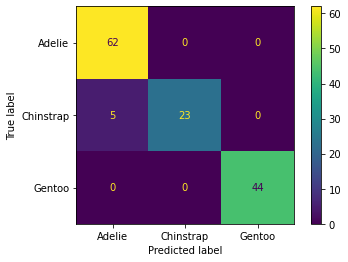

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
cmplot = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
cmplot.plot()
plt.show()

### Problem!

In the SVD demo we took the SVD of `X`. But the test data should be *unseen*. 
Hence we cannot include it in our training phase.

Let's look at the SVD of the scaled training data. 

In [20]:
# Let's again do this with SVD - but this time for X_train
U, S, VT = np.linalg.svd(X_train, full_matrices=False)
print("allclose? (T/F): ", np.allclose(X_train, U @ np.diag(S) @ VT))

allclose? (T/F):  True


S =  [23.37152008 12.25673506  8.82852756  4.64775173]


<BarContainer object of 4 artists>

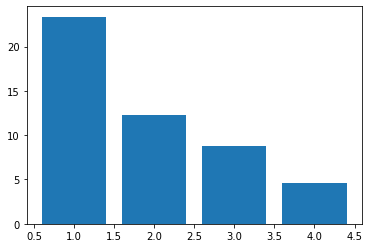

In [21]:
print("S = ", S)
plt.bar([1,2,3,4],S)

**Now things don't look so clear...**

Let's repeat our SVD experiment. We could try this...

In [22]:
accarray = np.zeros([4])
X = dfp2.iloc[:, 2:6].values
y = dfp2.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)
# scale the data
scaler = StandardScaler();
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# get the SVD of the training data. NOT the test data - WHY?
U, S, VT = np.linalg.svd(X_train, full_matrices=False)

In [23]:
Xc_train = np.zeros(X_train.shape)
nc = 1
for k in range(0, nc):
  Xc_train +=  S[k] * U[:,[k]] @ VT[[k],:]
print('nc = ', nc, ', ||X_train-Xc_train|| = ', np.linalg.norm(X_train - Xc_train))

# obtain classifier, fit using 2 NN's and the Manhattan norm
classifier = KNeighborsClassifier(n_neighbors=2, p=1)
classifier.fit(Xc_train, y_train)
# predict from the test data.
y_pred = classifier.predict(X_test)
# create a confusion matrix to assess the performance
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:"); print(cm)
accsc = accuracy_score(y_test,y_pred); print("Accuracy:", accsc)
print('nc = ', nc, ', ||X-Xc|| = ', np.linalg.norm(X_train - Xc_train))
# store the accuracy scores in a python list for nc=1,2,3,4
accarray[nc-1] = accsc
print(type(cm), cm.shape)

nc =  1 , ||X_train-Xc_train|| =  15.94013905919953
Confusion Matrix:
[[55  8  0]
 [16  8  3]
 [ 0  1 43]]
Accuracy: 0.7910447761194029
nc =  1 , ||X-Xc|| =  15.94013905919953
<class 'numpy.ndarray'> (3, 3)


In [24]:
# create a confusion matrix to assess the performance
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:"); print(cm)
accsc = accuracy_score(y_test,y_pred);
print("Accuracy:", accsc)

Confusion Matrix:
[[55  8  0]
 [16  8  3]
 [ 0  1 43]]
Accuracy: 0.7910447761194029


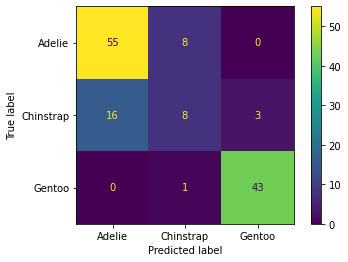

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
cmplot = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
cmplot.plot()
plt.show()

Let's wrap this up in a loop

nc =  1 , ||X_train-Xc_train|| =  15.885752236172209
nc =  2 , ||X_train-Xc_train|| =  10.064850342287789
nc =  3 , ||X_train-Xc_train|| =  4.304607224490962
nc =  4 , ||X_train-Xc_train|| =  2.2530887970186448e-14
Confusion Matrix:
[[52.  6.  0.]
 [19.  4.  2.]
 [ 0.  2. 49.]]
nc =  4 , ||X-Xc|| =  2.2530887970186448e-14
Accuracy: 0.7835820895522388
Confusion Matrix:
[[54.  4.  0.]
 [15. 10.  0.]
 [ 0.  0. 51.]]
nc =  4 , ||X-Xc|| =  2.2530887970186448e-14
Accuracy: 0.8582089552238806
Confusion Matrix:
[[58.  0.  0.]
 [ 2. 23.  0.]
 [ 0.  0. 51.]]
nc =  4 , ||X-Xc|| =  2.2530887970186448e-14
Accuracy: 0.9850746268656716
Confusion Matrix:
[[58.  0.  0.]
 [ 2. 23.  0.]
 [ 0.  0. 51.]]
nc =  4 , ||X-Xc|| =  2.2530887970186448e-14
Accuracy: 0.9850746268656716
[0.78358209 0.85820896 0.98507463 0.98507463]


(0.0, 1.0)

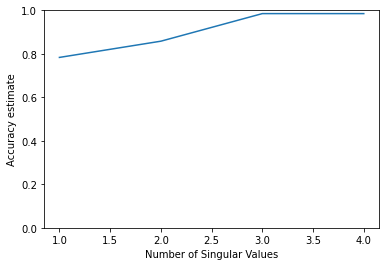

In [26]:
accarray = np.zeros([4])
cm_all = np.zeros([4,3,3])
X = dfp2.iloc[:, 2:6].values
y = dfp2.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)
# scale the data
scaler = StandardScaler();
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# get the SVD of the training data. NOT the test data - WHY?
U, S, VT = np.linalg.svd(X_train, full_matrices=False)

for k in range(4):
  Xc_train = np.zeros(X_train.shape)
  nc = 1+k
  for k in range(0, nc):
    Xc_train +=  S[k] * U[:,[k]] @ VT[[k],:]
  print('nc = ', nc, ', ||X_train-Xc_train|| = ', np.linalg.norm(X_train - Xc_train))

  # obtain classifier, fit using 2 NN's and the Manhattan norm
  classifier = KNeighborsClassifier(n_neighbors=2, p=1)
  classifier.fit(Xc_train, y_train)
  # predict from the test data.
  y_pred = classifier.predict(X_test)
  # create a confusion matrix to assess the performance
  cm_all[k,:,:] = confusion_matrix(y_test, y_pred)
  accarray[k] = accuracy_score(y_test,y_pred)


for k in range(4):
  print("Confusion Matrix:"); print(cm_all[k,:,:])
  print('nc = ', nc, ', ||X-Xc|| = ', np.linalg.norm(X_train - Xc_train))
  print("Accuracy:", accarray[k])

print(accarray)
plt.plot([1,2,3,4], accarray)
plt.xlabel('Number of Singular Values')
plt.ylabel('Accuracy estimate')
plt.ylim([0,1])

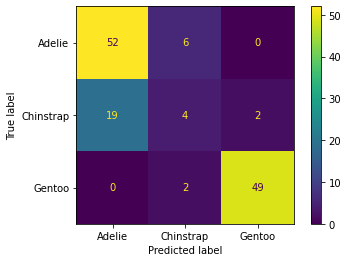

In [27]:
k=0
cmplot = ConfusionMatrixDisplay(cm_all[k,:,:], display_labels=classifier.classes_)
cmplot.plot()


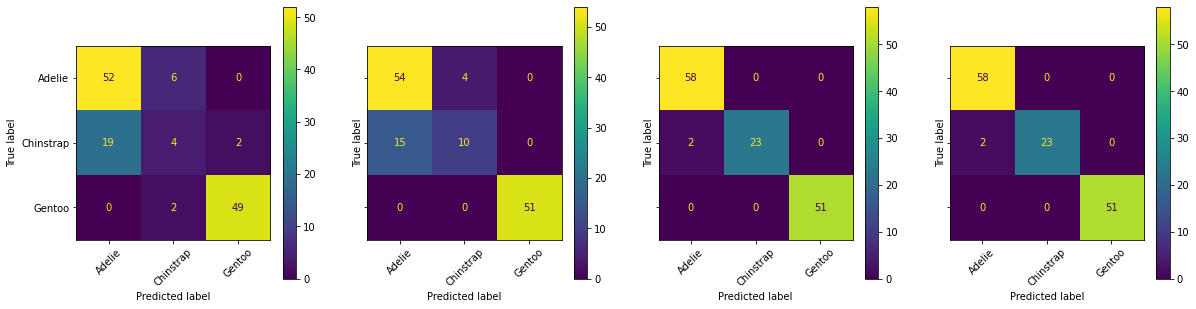

In [28]:
# subplot hints came from here:
# https://stackoverflow.com/questions/61825227/plotting-multiple-confusion-matrix-side-by-side

f, axes = plt.subplots(1, 4, figsize=(20, 5), sharey='row')
for k in range(4):
  cmplot = ConfusionMatrixDisplay(cm_all[k,:,:], display_labels=classifier.classes_)
  cmplot.plot(ax=axes[k], xticks_rotation=45)
plt.show()

### Review

We covered *just enough*, to make *progress at pace*. We looked at

- How the SVD and eigenvalue decomposition are related.
- How this becomes relevant to the data covariance matrix.
- How this can be used.

Now we can start putting all of this material to work.

## Technical Notes, Production and Archiving

Ignore the material below. What follows is not relevant to the material being taught.

#### Production Workflow

- Finalise the notebook material above
- Clear and fresh run of entire notebook
- Create html slide show:
  - `jupyter nbconvert --to slides 10_pca.ipynb `
- Set `OUTPUTTING=1` below
- Comment out the display of web-sourced diagrams
- Clear and fresh run of entire notebook
- Comment back in the display of web-sourced diagrams
- Clear all cell output
- Set `OUTPUTTING=0` below
- Save
- git add, commit and push to FML
- copy PDF, HTML etc to web site
  - git add, commit and push
- rebuild binder

Some of this originated from

<https://stackoverflow.com/questions/38540326/save-html-of-a-jupyter-notebook-from-within-the-notebook>

These lines create a back up of the notebook. They can be ignored.

At some point this is better as a bash script outside of the notebook

In [29]:
%%bash
NBROOTNAME=10_pca
OUTPUTTING=0

if [ $OUTPUTTING -eq 1 ]; then
  jupyter nbconvert --to html $NBROOTNAME.ipynb
  cp $NBROOTNAME.html ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.html
  mv -f $NBROOTNAME.html ./formats/html/

  jupyter nbconvert --to pdf $NBROOTNAME.ipynb
  cp $NBROOTNAME.pdf ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.pdf
  mv -f $NBROOTNAME.pdf ./formats/pdf/

  jupyter nbconvert --to script $NBROOTNAME.ipynb
  cp $NBROOTNAME.py ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.py
  mv -f $NBROOTNAME.py ./formats/py/
else
  echo 'Not Generating html, pdf and py output versions'
fi

Not Generating html, pdf and py output versions
